In [2]:
suppressMessages(library(ArchR))
suppressMessages(library(Seurat))
suppressMessages(library(Signac))
suppressMessages(library(harmony))
suppressMessages(library(dplyr))
suppressMessages(library(cowplot))
suppressMessages(library(harmony))
suppressMessages(library(Nebulosa))
suppressMessages(library(ggpubr))
suppressMessages(library(Ipaper))
suppressMessages(library(phateR))

In [3]:
set.seed(42)
getwd()

[1] "/data/scATA/SingleCellOpenChromatin/local/VisiumHeartRevision/IntegrativeAnalysis/Fibroblast/code"

In [4]:
coembed <- readRDS("../data/coembed/coembed.cleaning.Rds")
coembed

An object of class Seurat 
221802 features across 43563 samples within 3 assays 
Active assay: RNA (28933 features, 2000 variable features)
 2 other assays present: peaks, GeneActivity
 6 dimensional reductions calculated: pca, umap, harmony, umap_harmony, umap_harmony_v2, phate

In [5]:
## add annotation
new.cluster.ids <- c("0" = "Fib_0",
               "1" = "Myofib",
               "2" = "Fib_SCARA5",
               "3" = "Fib_3")

Idents(coembed) <- "RNA_snn_res.0.2"

coembed <- RenameIdents(coembed, new.cluster.ids)
coembed$annotation <- Idents(coembed)

In [6]:
cols.annotation <- ArchR::paletteDiscrete(coembed@meta.data[, glue::glue("annotation")])

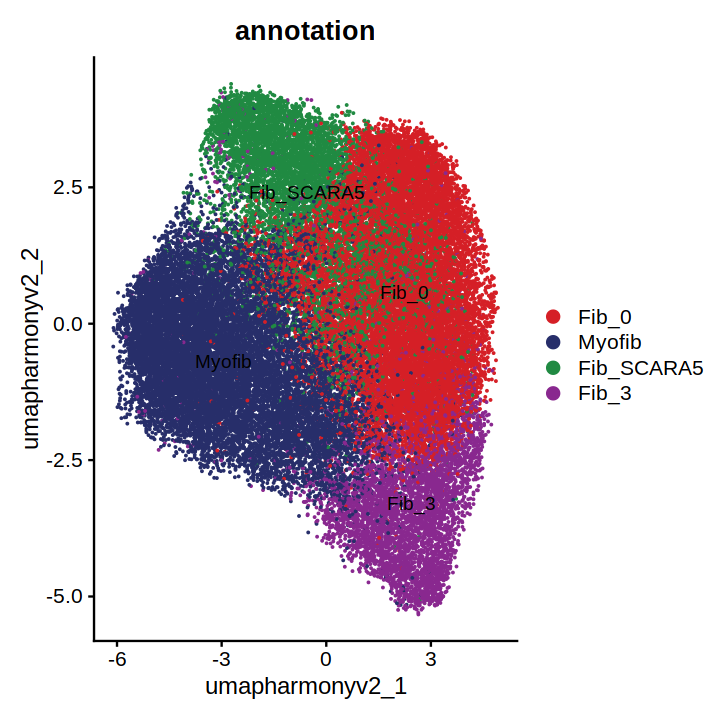

In [7]:
options(repr.plot.height = 6, repr.plot.width = 6)

DimPlot(coembed, reduction = "umap_harmony_v2", label = TRUE, group.by = "annotation",
       cols = cols.annotation)

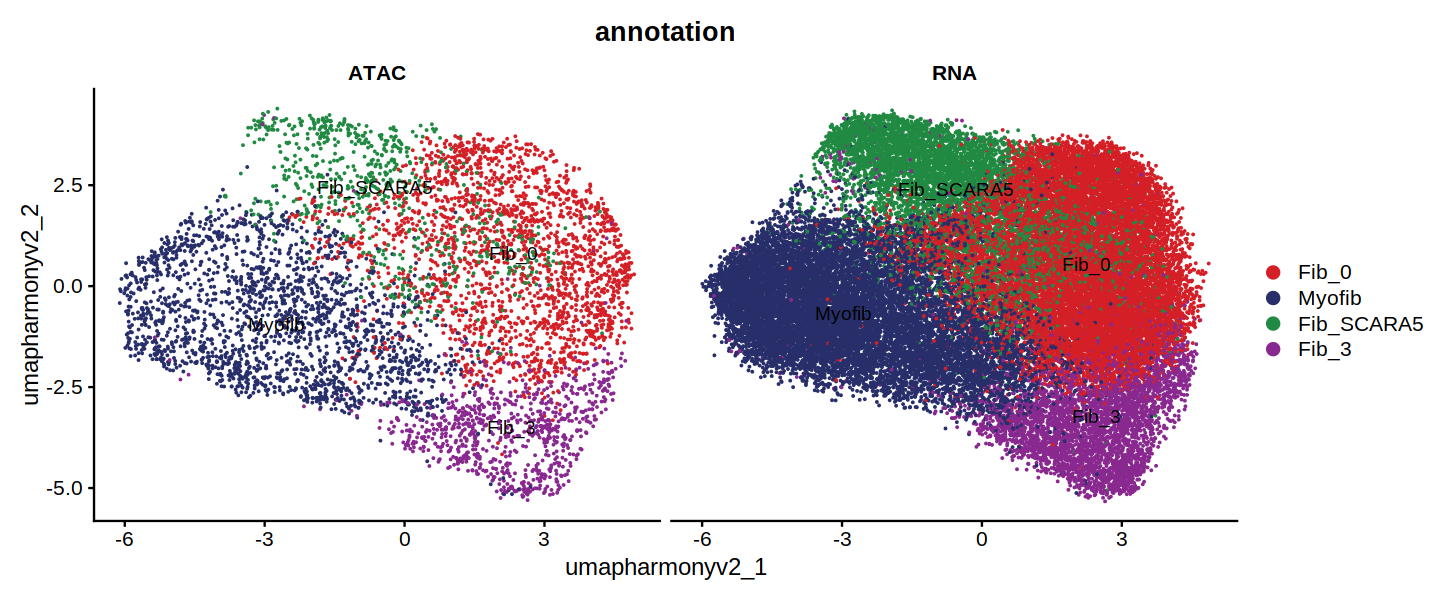

In [8]:
options(repr.plot.height = 5, repr.plot.width = 12)

DimPlot(coembed, reduction = "umap_harmony_v2", label = TRUE, group.by = "annotation",
       cols = cols.annotation, split.by = "tech")

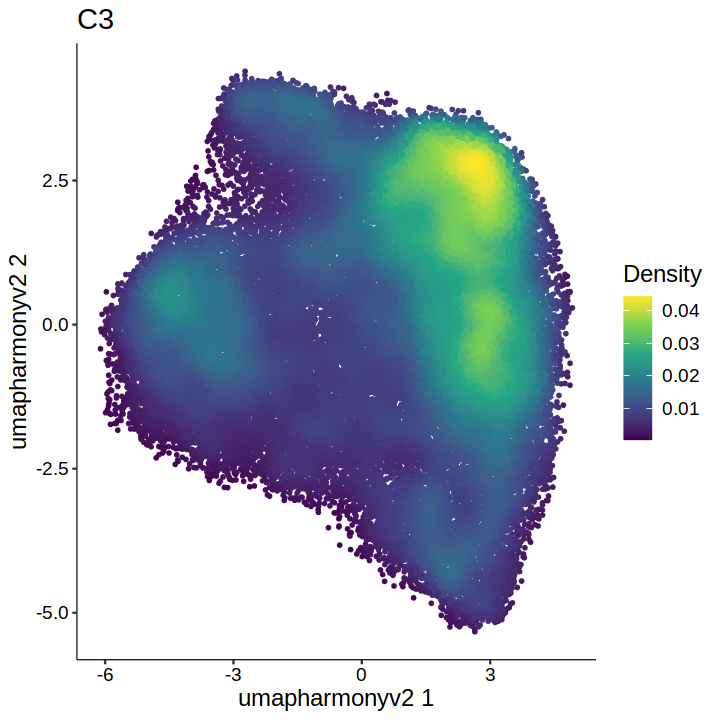

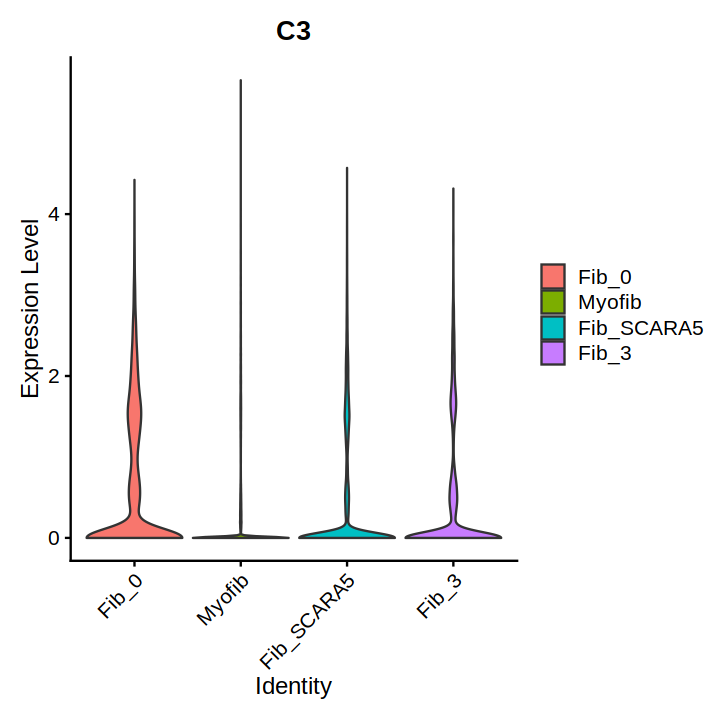

In [12]:
options(repr.plot.height = 6, repr.plot.width = 6)

plot_density(coembed, features="C3", reduction="umap_harmony_v2")

VlnPlot(coembed, features="C3", group.by = "annotation", pt.size = 0)

In [10]:
## duffusion map
library(destiny)

#matDR <- proj@embeddings$UMAP_Fib$df
matDR <- proj@reducedDims$harmony$matDR

dm <- DiffusionMap(as.matrix(matDR),
                   verbose = TRUE)


ERROR: Error in library(destiny): there is no package called ‘destiny’


In [ ]:
all.markers <- FindAllMarkers(coembed, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)
    
df <- all.markers %>%
    group_by(cluster) %>%
    slice_max(n = 10, order_by = avg_log2FC)

p <- DotPlot(coembed, features = unique(df$gene)) + RotatedAxis()
    
options(repr.plot.height = 5, repr.plot.width = 15)

print(p)

In [ ]:
if(!dir.exists("../data/coembed/MarkerGenesAfterAnnotation")){
    dir.create("../data/coembed/MarkerGenesAfterAnnotation")
}

markerList <- split(all.markers, all.markers$cluster)
    
for(i in 1:length(markerList)){
        markerList[[i]] <- markerList[[i]][order(-markerList[[i]]$avg_log2FC), ]
}
    
    WriteXLS::WriteXLS(markerList,
                   ExcelFileName = glue::glue("../data/coembed/MarkerGenesAfterAnnotation/annotation.xlsx"),
                   SheetNames = names(markerList))

saveRDS(all.markers, glue::glue("../data/coembed/MarkerGenesAfterAnnotation/annotation.rds"))

In [ ]:
saveRDS(coembed, file = "../data/coembed/coembed.annotation.Rds")

In [1]:
sessionInfo()

R version 4.1.1 (2021-08-10)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: CentOS Linux 8

Matrix products: default
BLAS/LAPACK: /home/rs619065/miniconda3/envs/r-4.1/lib/libopenblasp-r0.3.18.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

loaded via a namespace (and not attached):
 [1] fansi_0.5.0         digest_0.6.28       utf8_1.2.2         
 [4] crayon_1.4.2        IRdisplay_1.0       repr_1.1.3         
 [7] lifecycle_1.0.1     jsonlite_1.7.2      evaluate_0.14      
[10] pillar_1.6.4        rlang_0.4.12        uuid_1.0-3         
[13] vctrs_0.3.8         elli